In [1]:
import pandas as pd
import numpy as np

csv_path = '../raw_data/voice.csv'
raw_data = pd.read_csv(csv_path)

In [2]:
from sklearn.preprocessing import LabelEncoder
bdata = raw_data.copy()[['meanfun', 'IQR', 'label']]
# bdata = raw_data.copy()[['maxfun', 'modindx', 'label']]
encoder = LabelEncoder()
bdata_label = bdata["label"]
bdata_label_encoded = encoder.fit_transform(bdata_label)

bdata.drop(["label"], axis=1, inplace=True)
bdata["label"] = bdata_label_encoded
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
meanfun    3168 non-null float64
IQR        3168 non-null float64
label      3168 non-null int32
dtypes: float64(2), int32(1)
memory usage: 62.0 KB


In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bdata, test_size=0.2, random_state=20)

train_set = np.array(train_set)
test_set = np.array(test_set)

train_data, train_label = np.split(train_set, indices_or_sections=(2,),axis=1)
test_data, test_label = np.split(test_set, indices_or_sections=(2,),axis=1)

In [4]:
gamma = 0.3

In [5]:
def landmark_fetch(pos):
#     delta = 0.5
#     my_np = np.array(bdata)[:, pos]
#     landmark =[np.percentile(my_np, i*delta) for i in range(int(100/delta) + 1)]
    landmark = train_data[::50, pos]
#     landmark = [np.percentile(my_np, 0), np.percentile(my_np, 20), np.percentile(my_np, 40), np.percentile(my_np, 60), np.percentile(my_np, 80), np.percentile(my_np, 100)]
    return landmark
# landmark = [np.percentile(myarr[:, 0], 20)]

In [6]:
def RBF(myarr):
    cp1 = basicRBF(myarr[:, 0], landmark_fetch(0))
    cp2 = basicRBF(myarr[:, 1], landmark_fetch(1))
    return np.c_[myarr[:, 0], 200*np.power(myarr[:, 0], 1/2), 100*np.power(myarr[:, 0], 1/3), 100*1./(1+np.exp(-myarr[:, 0])), 100*np.tanh(myarr[:, 0]), 20*cp1,
                 myarr[:, 1], 200*np.power(myarr[:, 1], 1/2), 100*np.power(myarr[:, 1], 1/3), 100*1./(1+np.exp(-myarr[:, 1])), 100*np.tanh(myarr[:, 1]), 20*cp2]

#     return np.c_[myarr[:, 0], cp1, myarr[:, 1], cp2]


#     return np.c_[myarr[:, 0], np.power(myarr[:, 0], 2),
#                  myarr[:, 1], np.power(myarr[:, 1], 2)]
    return np.c_[myarr[:, 0], 
                 myarr[:, 1]]

def basicRBF(myarr, landmark):
    ft = np.exp(-gamma * np.square(myarr - landmark[0]))
    for i in range(len(landmark) - 1):
        ft = np.c_[ft, np.exp(-gamma * np.square(myarr - landmark[i+1]))]
    
#     ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 20)))]
#     ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 40)))]
#     ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 60)))]
#     ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 80)))]
#     ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 100)))]
#     for i in range(5):
#         ft = np.c_[ft, np.exp(-gamma * np.square(myarr[:, 0] - np.percentile(myarr[:, 0], 20*(i+1))))]
#     ft2 = 
#     ft3 = np.exp(-gamma * np.square(myarr[:, 1] - np.percentile(myarr[:, 1], 20)))
#     ft4 = np.exp(-gamma * np.square(myarr[:, 1] - np.percentile(myarr[:, 1], 100)))
    return ft

In [7]:
# train_ft1 = np.exp(-gamma * (train_data[:, 0] - np.percentile(train_data[:, 0], 25)))
# train_ft2 = np.exp(-gamma * (train_data[:, 0] - np.percentile(train_data[:, 0], 75)))
# train_ft3 = np.exp(-gamma * (train_data[:, 1] - np.percentile(train_data[:, 1], 25)))
# train_ft4 = np.exp(-gamma * (train_data[:, 1] - np.percentile(train_data[:, 1], 75)))
# train_data_ = np.c_[train_ft1, train_ft2, train_ft3, train_ft4]
train_data_ = RBF(train_data)
test_data_ = RBF(test_data)

In [8]:
# test_ft1 = np.exp(-gamma * (test_data[:, 0] - np.percentile(test_data[:, 0], 25)))
# test_ft2 = np.exp(-gamma * (test_data[:, 0] - np.percentile(test_data[:, 0], 75)))
# test_ft3 = np.exp(-gamma * (test_data[:, 1] - np.percentile(test_data[:, 1], 25)))
# test_ft4 = np.exp(-gamma * (test_data[:, 1] - np.percentile(test_data[:, 1], 75)))
# test_data_ = np.c_[test_ft1, test_ft2, test_ft3, test_ft4]

In [9]:
# from utils import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(train_data_,train_label.ravel())

# from utils import RandomForest
# classifier = RandomForest(n_estimators=500, max_depth=16)
# classifier.fit(train_data_,train_label.ravel())

#========================================================================

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(train_data_,train_label.ravel())

# from sklearn.tree import DecisionTreeClassifier 
# classifier = DecisionTreeClassifier(max_depth=5) 
# # classifier = DecisionTreeClassifier()
# classifier.fit(train_data_,train_label.ravel())


# from sklearn.ensemble import RandomForestClassifier 
# # classifier = RandomForestClassifier(n_estimators=500, n_jobs=-1) 
# classifier = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) 
# classifier.fit(train_data_,train_label.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import confusion_matrix
train_hat = classifier.predict(train_data_) # 训练集的预测标签
test_hat = classifier.predict(test_data_) # 测试集的预测标签 
confusion_matrix(test_label.ravel(), test_hat)
# print(test_data_pred)

array([[307,   8],
       [ 11, 308]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(test_label.ravel(), test_hat))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       315
         1.0       0.97      0.97      0.97       319

   micro avg       0.97      0.97      0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [12]:
from sklearn.metrics import accuracy_score
print("训练集：",  accuracy_score(train_label,train_hat))
print("测试集：", accuracy_score(test_label,test_hat))

训练集： 0.9656669297553275
测试集： 0.9700315457413249


In [13]:
x1_min, x1_max = test_data[:, 0].min(), test_data[:, 0].max()  # 第0列的范围
x2_min, x2_max = test_data[:, 1].min(), test_data[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
# print(grid_test)
grid_test_rbf = RBF(grid_test)
grid_hat = classifier.predict(grid_test_rbf)
grid_hat = grid_hat.reshape(np.shape(x1))
# print(grid_hat)

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
 
cm_light = mpl.colors.ListedColormap(['#FFB0A0', '#A0B0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])


plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示

plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label.ravel(), edgecolors='w', s=10, cmap=cm_dark)  # 样本

# plt.scatter(train_data[:, 0], train_data[:, 1], c=tra_label, edgecolors='k', s=1, cmap=cm_dark)  # 样本

# plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'meanfun', fontsize=13)
plt.ylabel(u'IQR', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'Gender Recognition', fontsize=15)
# plt.grid()
plt.show()
plt.close()

<Figure size 640x480 with 1 Axes>

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import metrics

# y = test_label.ravel()

# print(y)
# # scores = np.array([0.1, 0.4, 0.35, 0.8])
# scores = np.max(classifier.predict_proba(test_data_), axis=1) # 测试集的预测标签 
# # scores = np.array(scores) * np.array(y)
# # print(scores)

# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
# plt.plot(fpr,tpr)
# # plt.close()

In [16]:
classifier.predict_proba(train_data_)

array([[9.94310575e-01, 5.68942472e-03],
       [9.99996826e-01, 3.17368513e-06],
       [9.58644056e-01, 4.13559437e-02],
       ...,
       [6.87649861e-01, 3.12350139e-01],
       [6.32554203e-03, 9.93674458e-01],
       [9.98409572e-01, 1.59042827e-03]])

In [17]:
sav_y = test_label.ravel()
sav_score = classifier.predict_proba(test_data_)[:, 1]
np.save("../gen_data/1.npy",sav_y)
np.save("../gen_data/1s.npy",sav_score)

AUC: 0.9917002537692193


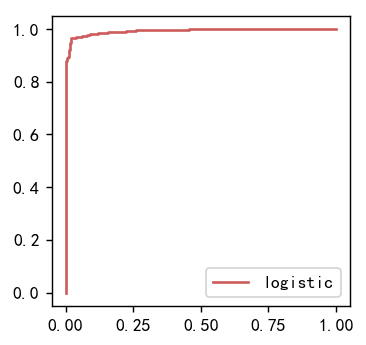

In [19]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc


model=np.array(['logistic'])   # 麻烦大哥把几个模型的名字补进去
fig, ax = plt.subplots(1, 1, dpi=128, figsize=(3, 3))
line_color = ["indianred", "steelblue", "green", "orange", "mediumpurple", "darkviolet", "gold", "royalblue", "pink"]

for i in range(0, model.shape[0]):
    y = test_label.ravel()
#     scores = np.max(classifier.predict_proba(train_data_), axis=1)
#     scores = train_hat[:,1]   # 只取 true
    scores = classifier.predict_proba(test_data_)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    # print(fpr)
    # print(tpr)
    ax.plot(fpr, tpr, color=line_color[i], label=model[i])
    ax.legend()
    AUC = auc(fpr, tpr) 
    print('AUC: ' + str(AUC))

In [24]:
npy_path = "../gen_data/0.npy"
len(npy_path)
d = 1
# npy_path[12] = str(1)
npy_path = npy_path[:12] + str(1) +npy_path[13:]

In [25]:
npy_path

'../gen_data/1.npy'

logistic            	 AUC:   	0.9810817534955466
logistic_with_kernel	 AUC:   	0.9917002537692193
DT                  	 AUC:   	0.952779021744539
DT_with_limit       	 AUC:   	0.9788674926605961
RF                  	 AUC:   	0.9886500472707371
RF_with_limit       	 AUC:   	0.9929193411952032


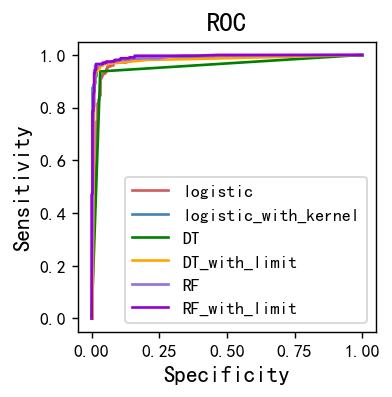

In [44]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc

npy_path = "../gen_data/0.npy"
npy_s_path = "../gen_data/0s.npy"

model=np.array(['logistic','logistic_with_kernel', 'DT', 'DT_with_limit', 'RF', 'RF_with_limit'])   # 麻烦大哥把几个模型的名字补进去
fig, ax = plt.subplots(1, 1, dpi=128, figsize=(3, 3))
line_color = ["indianred", "steelblue", "green", "orange", "mediumpurple", "darkviolet", "gold", "royalblue", "pink"]

for i in range(0, model.shape[0]):
#     y = test_label.ravel()
# #     scores = np.max(classifier.predict_proba(train_data_), axis=1)
# #     scores = train_hat[:,1]   # 只取 true
#     scores = classifier.predict_proba(test_data_)[:, 1]
    npy_path = npy_path[:12] + str(i) + npy_path[13:]
    npy_s_path = npy_s_path[:12] + str(i) + npy_s_path[13:]
    y = np.load(npy_path)
    scores = np.load(npy_s_path)
    
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    # print(fpr)
    # print(tpr)
    ax.plot(fpr, tpr, color=line_color[i], label=model[i])
    ax.legend()
    AUC = auc(fpr, tpr) 
#     print('%s AUC: %s'  %(model[i],str(AUC)))
    mat = "{:20}\t{:8}\t{:10}"
    print(mat.format(model[i]," AUC: ", str(AUC)))
    
    
plt.xlabel(u'Specificity', fontsize=13)
plt.ylabel(u'Sensitivity', fontsize=13)
plt.title(u'ROC', fontsize=15)
plt.savefig("filename.png")

In [43]:
mat = "{:10}\t{:20}\t{:10}"
print(mat.format("占4个长度","占8个长度", "占12长度"))

占4个长度     	占8个长度               	占12长度     
